In [1]:
import numpy as np # General numerics
from scipy.integrate import odeint # Integration
from scipy.optimize import minimize # Optimization
import matplotlib.pyplot as plt # Plotting

ns=16
x10 = 1 
x20 = 0.1
x30 = 40
x40 = 0
x50 = 0
x60 = 1
x70 = 0
x80 = 0
w1=np.ones(ns)*0.5
w2=np.ones(ns)*0.5
w0=[]
for d in range(2*len(w1)):
    if d<len(w1):
        w0.append(w1[d])
    else:
        w0.append(w2[d-ns])
inte=2
for i in range(1,inte):
    t = np.linspace(0,10,ns+1)
    def state(y,t,w1,w2):
        x1,x2,x3,x4,x5,x6,x7,x8 = y
        
        f = [ w1+w2,
            ((x3/(14.35+x3+(x3**2/111.5))*(x6+x7*0.22/(0.22+x5)))*x2-(w1+w2)*x2/x1),
            (w1/x1*100-(w1+w2)*x3/x1-(x3/(14.35+x3+(x3**2/111.5))*(x6+x7*0.22/(0.22+x5)))*x2/0.51),
            ((0.233*x3/(14.35+x3+(x3**2/111.5))*((0.0005+x5)/(0.022+x5)))*x2-(w1+w2)*x4/x1),
            (w2*4/x1-(w1+w2)*x5/x1),
            (-(0.09*x5/(0.034+x5))*x6),
            ((0.09*x5/(0.034+x5))*(1-x7)),
            w2]
        
        return f
    def objective(w0):
        y0 = [x10,x20,x30,x40,x50,x60,x70,x80]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],w0[ns+ks],), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
            y0=sol[-1]
        obj = -sol[-1][0]*sol[-1][3]+0*sol[-1][7]
        return obj

    
    bnd=[]
    for o in range(0,2*ns): 
        if o < ns:
            bnd.append((0,1))
        else:
            bnd.append((0,1))
    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=bnd, constraints=(), tol=None, callback=None,options={'maxiter': 10000,'disp':True})
    w0=[]
    for o in range(0,ns): 
        w0.append(res.x[o])
        w0.append(res.x[o])
    ns=ns*2

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6.151047584297397
            Iterations: 68
            Function evaluations: 2200
            Gradient evaluations: 64


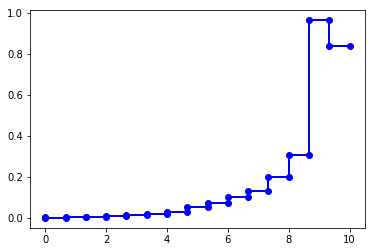

In [2]:
plt.step(np.linspace(0,10,16),res.x[0:16],'bo',LineWidth=2)
plt.show()

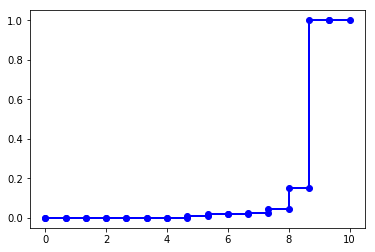

In [3]:
plt.step(np.linspace(0,10,16),res.x[16:32],'bo',LineWidth=2)
plt.show()